In [4]:
import os
import sys
current_path=[os.getcwd()]
data_rootdir_pre1 = [current_path[0]+'\\Data\\IEEE\\Abstract']
data_files1=os.listdir(current_path[0]+'\\Data\\IEEE\\Abstract')
data_rootdir_pre2 = [current_path[0]+'\\Data\\IEEE\\Note']
data_files2=os.listdir(current_path[0]+'\\Data\\IEEE\\Note')
data_dir_pre1=[]
for i1 in range(len(data_files1)):
    data_dir_pre1.append(data_rootdir_pre1[0]+'\\'+data_files1[i1])
data_dir_pre2=[]
for i2 in range(len(data_files2)):
    data_dir_pre2.append(data_rootdir_pre2[0]+'\\'+data_files2[i2])

out_path=[current_path[0]+'\\Result']
# out_path=os.getcwd()
out_dir_plk = [out_path[0]+'\\data20230620']   
out_dir_pre = [out_path[0]+'\\out20230620']
out_dir_windowtopic = [out_path[0]+'\\out20230620']
out_dir_dynamictopic = [out_path[0]+'\\out20230620']

out_dir_plk1 = [out_path[0]+'\\data20230620A']   
out_dir_pre1 = [out_path[0]+'\\out20230620A']
out_dir_windowtopic1 = [out_path[0]+'\\out20230620A']
out_dir_dynamictopic1 = [out_path[0]+'\\out20230620A']
# out_dir_plk2 = [out_path[0]+'\\data20230620N']   
# out_dir_pre2 = [out_path[0]+'\\out20230620N']
# out_dir_windowtopic2 = [out_path[0]+'\\out20230620N']
# out_dir_dynamictopic2 = [out_path[0]+'\\out20230620N']

# out_dir_STtopic = [out_path[0]+'\\out20230620sparseST']
CSV_name1=['\selectedA.csv']

def makedir(folder_path_list):
    for i in range(0,len(folder_path_list),1):
        folder = os.path.exists(folder_path_list[i])
        if not folder:
            os.makedirs(folder_path_list[i])
makedir(out_dir_plk)
makedir(out_dir_pre)
makedir(out_dir_windowtopic)
makedir(out_dir_dynamictopic)
makedir(out_dir_plk1)
makedir(out_dir_pre1)
makedir(out_dir_windowtopic1)
makedir(out_dir_dynamictopic1)
# makedir(out_dir_plk2)
# makedir(out_dir_pre2)
# makedir(out_dir_windowtopic2)
# makedir(out_dir_dynamictopic2)
# makedir(out_dir_STtopic)

# stopwords_dir=['F:\\NMF\\nmf\\Experiment\\text\\stopwords_yy20191205.txt']
# stopwords_dir=['F:\\NMF\\nmf\\Experiment\\text\\stopwords.txt']
stopwords_dir = [current_path[0]+'\\text\\stopwords_yy20220521.txt']

In [ ]:
# # Step 1.1: Pre-processing
# # -> output file: *.pkl in out
# # python prep-text.py data/sample/month1 data/sample/month2 data/sample/month3 -o data --tfidf --norm
# # print(os.getcwd())
# option_pre = ['-o'] + out_dir_plk + ['-s'] + stopwords_dir + ['--df','2','--tfidf', '--norm','--ngram', '3']
# command_pre=['start cmd /k']+['"E: & cd'] + current_path+['&']+['python  prep-text.py'] + data_dir_pre1 + data_dir_pre2 + option_pre
# command_pre = ' '.join(command_pre)
# # print(command_pre)
# os.system(command_pre)

In [14]:
# Step 1.1A: Pre-processing
option_pre1 = ['-o'] + out_dir_plk1 + ['-s'] + stopwords_dir + ['--df','2','--tfidf', '--norm','--ngram', '3']
command_pre1=['start cmd /k']+['"E: & cd'] + current_path+['&']+['python  prep-text.py'] + data_dir_pre1 + option_pre1
command_pre1 = ' '.join(command_pre1)
# print(command_pre1)
os.system(command_pre1)

0

In [ ]:
# # Step 1.1N: Pre-processing
# option_pre2 = ['-o'] + out_dir_plk2 + ['-s'] + stopwords_dir + ['--df','2','--tfidf', '--norm','--ngram', '3']
# command_pre2=['start cmd /k']+['"E: & cd'] + current_path+['&']+['python  prep-text.py'] + data_dir_pre2 + option_pre2
# command_pre2 = ' '.join(command_pre2)
# # print(command_pre1)
# os.system(command_pre2)

In [12]:
# ######################################## run once
# Step 1.2: Pre-processing（build Word2Vec model: ）
# -> output file: w2v-model.bin in out
option_word2vec = ['-o'] + out_dir_pre + ['-m', 'sg'] + ['-s'] + stopwords_dir               # output directory, this is the default value 
command_word2vec=['start cmd /k']+['"E: & cd']+current_path+['&']+['python prep-word2vec.py'] + data_dir_pre1 + data_dir_pre2 +option_word2vec
command_word2vec = ' '.join(command_word2vec)
os.system(command_word2vec)

0

In [3]:
# ######################################## run once
# # Step 1.2A: Pre-processing 如和Step1.2 共用一个word2vec 模型，则不需要单独训练
# option_word2vec1= ['-o'] + out_dir_pre + ['-m', 'sg'] + ['-s'] + stopwords_dir               # output directory, this is the default value 
# command_word2vec1=['start cmd /k']+['"E: & cd']+current_path+['&']+['python prep-word2vec.py'] + data_dir_pre1+option_word2vec1
# command_word2vec1 = ' '.join(command_word2vec1)
# os.system(command_word2vec1)

In [20]:
######################################## run once
# Step 2A: Window Topic Modeling
# python find-window-topics.py data/*.pkl -k 4,10 -o out -m out/w2v-model.bin -w selected.csv
option_windowtopic = ['-o'] + out_dir_pre1 + ['-m', 'sg']                # output directory, this is the default value 
topic_range=['5,20']
data_pkl_rootdir1 = out_dir_plk1
data_pkl1=os.listdir(data_pkl_rootdir1[0])
data_pkl_dir1=[]
for i in range(len(data_pkl1)):
    data_pkl_dir1.append(data_pkl_rootdir1[0]+'\\'+data_pkl1[i])
# print(data_pkl_dir1)

option_windowtopic1=['-o']+out_dir_windowtopic1+['-m']+[out_dir_pre[0]+'\w2v-model.bin']+['-w']+[out_dir_windowtopic1[0]+CSV_name1[0]]

command_windowtopic1=['start cmd /k']+['"E: & cd']+current_path+['&']+['python find-window-topics.py'] +data_pkl_dir1+['-k'] +topic_range+option_windowtopic1
command_windowtopic1 = ' '.join(command_windowtopic1)
os.system(command_windowtopic1)
# print(command_windowtopic1)

0

In [35]:
# Step 3A: Dynamic Topic Modeling
# python find-dynamic-topics.py out/month1_windowtopics_k05.pkl out/month2_windowtopics_k08.pkl out/month3_windowtopics_k08.pkl -k 4,10 -o out -m out/w2v-model.bin 
topic_range=['5,20']
topic_top_num=['20']#以每个主题前20个词计算主题排名
windowtopic_eachyear_dir=[]
import csv
exampleFile = open(out_dir_windowtopic1[0]+CSV_name1[0])
exampleReader = csv.reader(exampleFile)
exampleData = list(exampleReader)
# print(exampleData)
for i in range(1,len(data_files1)+1):
    windowtopic_eachyear_dir.append(out_dir_windowtopic1[0]+'\\'+exampleData[i][0]+'_windowtopics_k'+exampleData[i][1].zfill(2)+'.pkl')
# print(windowtopic_eachyear_dir)    
option_dynamictopic=['-t']+topic_top_num+['-k']+topic_range+['-o']+out_dir_windowtopic1+['-m']+[out_dir_pre[0]+'\w2v-model.bin']

#稀疏实验
# option_dynamictopic=['-t']+topic_top_num+['-k']+topic_range+ ['-a 0.00001 -b 0.00001']+['-o']+out_dir_windowtopic1+['-m']+[out_dir_pre[0]+'\w2v-model.bin']
# option_dynamictopic=['-t']+topic_top_num+['-k']+topic_range+ ['-a 0.00001']+['-o']+out_dir_windowtopic1+['-m']+[out_dir_pre[0]+'\w2v-model.bin']
# option_dynamictopic=['-t']+topic_top_num+['-k']+topic_range+ ['-a 0.000012 -b 0.000013']+['-o']+out_dir_windowtopic1+['-m']+[out_dir_pre[0]+'\w2v-model.bin']

command_dynamictopic=['start cmd /k']+['"E: & cd']+current_path+['&']+['python find-dynamic-topics.py'] +windowtopic_eachyear_dir+option_dynamictopic
command_dynamictopic = ' '.join(command_dynamictopic)
# print(command_dynamictopic)
os.system(command_dynamictopic)

# - Top recommendations for number of dynamic topics: 18,19,13 ['-a 0 -b 0'] Model coherence:0.5677,0.5634,0.5631

0

In [34]:
# Step 3.1A: Dynamic Topic Modeling ConvexNMF
# python find-dynamic-topics.py out/month1_windowtopics_k05.pkl out/month2_windowtopics_k08.pkl out/month3_windowtopics_k08.pkl -k 4,10 -o out -m out/w2v-model.bin 
topic_range=['18,18']
topic_top_num=['20']#以每个主题前20个词计算主题排名
windowtopic_eachyear_dir=[]
import csv
exampleFile = open(out_dir_windowtopic1[0]+CSV_name1[0])
exampleReader = csv.reader(exampleFile)
exampleData = list(exampleReader)
# print(exampleData)
for i in range(1,len(data_files1)+1):
    windowtopic_eachyear_dir.append(out_dir_windowtopic1[0]+'\\'+exampleData[i][0]+'_windowtopics_k'+exampleData[i][1].zfill(2)+'.pkl')
# print(windowtopic_eachyear_dir)    
option_dynamictopic=['-t']+topic_top_num+['-k']+topic_range+['-o']+out_dir_windowtopic1+['-m']+[out_dir_pre[0]+'\w2v-model.bin']

#稀疏实验
# option_dynamictopic=['-t']+topic_top_num+['-k']+topic_range+ ['-a 0.00001 -b 0.00001']+['-o']+out_dir_windowtopic1+['-m']+[out_dir_pre[0]+'\w2v-model.bin']
# option_dynamictopic=['-t']+topic_top_num+['-k']+topic_range+ ['-a 0.00001']+['-o']+out_dir_windowtopic1+['-m']+[out_dir_pre[0]+'\w2v-model.bin']
# option_dynamictopic=['-t']+topic_top_num+['-k']+topic_range+ ['-a 0.000012 -b 0.000013']+['-o']+out_dir_windowtopic1+['-m']+[out_dir_pre[0]+'\w2v-model.bin']

command_dynamictopic=['start cmd /k']+['"E: & cd']+current_path+['&']+['python find-dynamic-topics-convex.py'] +windowtopic_eachyear_dir+option_dynamictopic
command_dynamictopic = ' '.join(command_dynamictopic)
# print(command_dynamictopic)
os.system(command_dynamictopic)

# - Top recommendations for number of dynamic topics: 18, beta_loss="kullback-leibler", solver ="mu", alpha_W = 0.0, alpha_H = 0.0, l1_ratio = 1.0, Model coherence:0.5616
# - Top recommendations for number of dynamic topics: 18, alpha_W = 0.0, alpha_H = 0.0, l1_ratio = 1.0, Model coherence:0.5573

0

In [37]:
# Step 5A: Result analysis
import unsupervised.nmf
import numpy as np
dynamic_res = unsupervised.nmf.load_nmf_results(out_dir_dynamictopic1[0]+'\\dynamictopics_k18.pkl')

print(np.shape(dynamic_res[0]))
print(np.shape(dynamic_res[1]))
print(np.shape(dynamic_res[2]))
print(np.shape(dynamic_res[3]))
print(np.shape(dynamic_res[4]))
print(np.shape(dynamic_res[5]))
for i in range(len(dynamic_res[2])):
#     print('DT'+str(i+1),dynamic_res[2][i][0:10])
    print(dynamic_res[2][i][0],dynamic_res[2][i][1],dynamic_res[2][i][2],dynamic_res[2][i][3],dynamic_res[2][i][4],dynamic_res[2][i][5],dynamic_res[2][i][6],dynamic_res[2][i][7],dynamic_res[2][i][8],dynamic_res[2][i][9])

(284,)
(6713,)
(18, 6713)
(284,)
(284, 18)
(18, 6713)
agent power vehicle grid operation traffic simulation communication base mode
robot mobile motion task localization environment mobile robot map position robotic
schedule task resource operation cloud job minimize assignment provider exist
service user customer composition web cloud web service intelligent provider service composition
wafer tool cluster cluster tool schedule cycle chamber lot processing delay
sensor degradation measurement estimate failure estimation signal unit fusion node
net petri net petri transition place modeling marking supervisor behavior timed
controller track loop plant uncertainty logic trajectory motion closed loop actuator
path planning trajectory vehicle path planning motion surface plan generate autonomous
product assembly manufacturing disassembly shape variation methodology dimensional development part
image feature defect detection classification surface accuracy signal camera high
cell force injec

In [38]:
W_A = [0 for i in range(len(dynamic_res[6]))]
print(np.shape(W_A))
for j in range(len(dynamic_res[6])):
    for i in range(len(dynamic_res[4])):
        W_A[j]=W_A[j]+dynamic_res[4][i][j]
List_W_A=[]
for j in range(len(dynamic_res[6])):
#     print('DT'+str(j+1),W_A[j]/sum(W_A))
    List_W_A.append(W_A[j]/sum(W_A))
    print(W_A[j]/sum(W_A))

(18,)
0.037457859490461425
0.049706911984718515
0.04311343638953595
0.04779556299552264
0.0520372554767666
0.06799484148674893
0.0527174130544213
0.0805314255695466
0.045592664025025015
0.0682980328727603
0.09010171001475187
0.041678440099605356
0.03294909018250307
0.0671755365998422
0.055570898710303865
0.0517008824296192
0.07886938434293397
0.03670865427493307


In [39]:
def max_num_index_list(list_orginal,top_num):
    index_list=[]
    import copy
    list_temp=copy.copy(list_orginal)
    import math
    for i in range(0,top_num,1):
        index_list.append(list_temp.index(max(list_temp)))
        list_temp[list_temp.index(max(list_temp))]=-math.inf
    return index_list
max_num_index_list(List_W_A,len(dynamic_res[6]))

[10, 7, 16, 9, 5, 13, 14, 6, 4, 15, 1, 3, 8, 2, 11, 0, 17, 12]

In [40]:
topic_order=max_num_index_list(List_W_A,len(dynamic_res[2]))
for i in range(len(dynamic_res[2])):
    print('DT'+str(i+1),dynamic_res[2][topic_order[i]][0:10])
#     print('DT'+str(i+1),dynamic_res[2][topic_order[i]][0:20])
#     print(dynamic_res[2][topic_order[i]][0],',',dynamic_res[2][topic_order[i]][1],',',dynamic_res[2][topic_order[i]][2],',',dynamic_res[2][topic_order[i]][3],',',dynamic_res[2][topic_order[i]][4],',',dynamic_res[2][topic_order[i]][5],',',dynamic_res[2][topic_order[i]][6],',',dynamic_res[2][topic_order[i]][7],',',dynamic_res[2][topic_order[i]][8],',',dynamic_res[2][topic_order[i]][9])
# List_W_A
for i in range(len(dynamic_res[2])):
    print(List_W_A[topic_order[i]])

DT1 ['image', 'feature', 'defect', 'detection', 'classification', 'surface', 'accuracy', 'signal', 'camera', 'high']
DT2 ['controller', 'track', 'loop', 'plant', 'uncertainty', 'logic', 'trajectory', 'motion', 'closed loop', 'actuator']
DT3 ['object', 'force', 'contact', 'grasp', 'manipulation', 'part', 'motion', 'robotic', 'assembly', 'fixture']
DT4 ['product', 'assembly', 'manufacturing', 'disassembly', 'shape', 'variation', 'methodology', 'dimensional', 'development', 'part']
DT5 ['sensor', 'degradation', 'measurement', 'estimate', 'failure', 'estimation', 'signal', 'unit', 'fusion', 'node']
DT6 ['machine', 'production', 'line', 'part', 'manufacturing', 'consumption', 'material', 'job', 'operation', 'production line']
DT7 ['policy', 'inventory', 'resource', 'action', 'stage', 'customer', 'allocation', 'capacity', 'discharge', 'simulation']
DT8 ['net', 'petri net', 'petri', 'transition', 'place', 'modeling', 'marking', 'supervisor', 'behavior', 'timed']
DT9 ['wafer', 'tool', 'cluster

0.24464337540100564


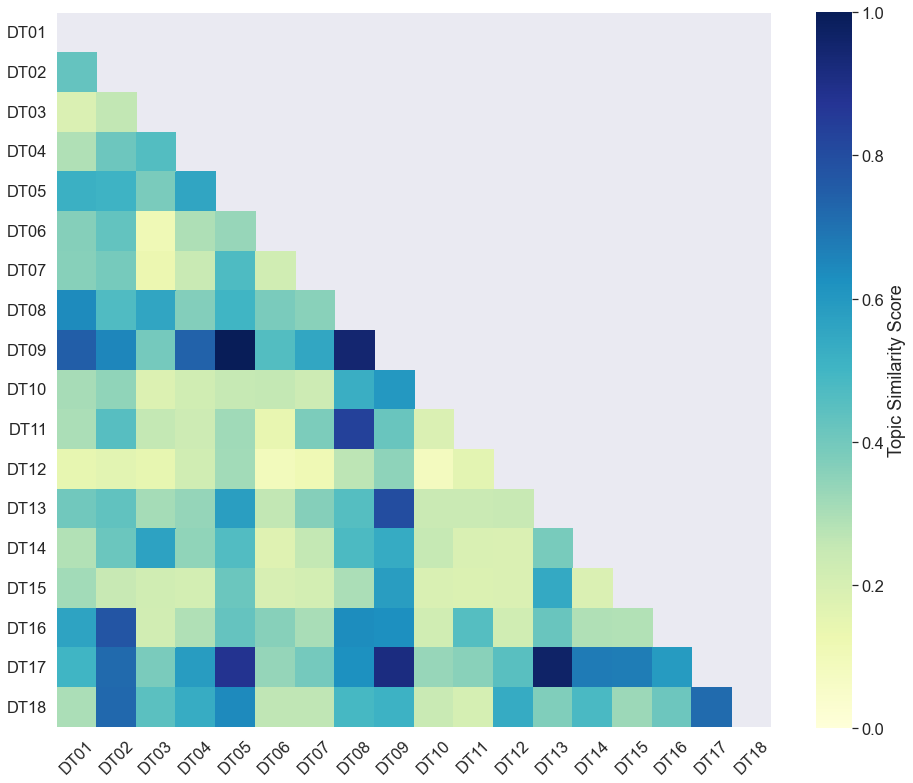

In [49]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics.pairwise import cosine_similarity    
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size

def load_NMF(my_path):
    my_NMF = joblib.load(my_path) 
    return my_NMF

if __name__ == "__main__":
    "Generate the similarity matrix of the paper K=18: Fig 4.11"
    ">>> the topic-word below the figure are added separately by hand in (fig.docx)"
    
    "1. Load doc-dynamic_topic matrix info"
    "Case for K = 18"
    dynamic_path = out_dir_dynamictopic1[0]+'\\dynamictopics_k18.pkl'
    dy_NMF = load_NMF(dynamic_path)  
    year_doc = dy_NMF[0]         # year: [start, end)
    all_terms = dy_NMF[1]         # dictionary of dynamic_NMF 
    dy_term_rankings = dy_NMF[2]  # ranked terms: for each topic 
    dy_partition = dy_NMF[3]      # Topic assignment: assign to specific Dynamic topic (single membership)
    dy_W = dy_NMF[4]              # WH = X: document_topic matrix  
    dy_H = dy_NMF[5]              # WH = X: topic_term matrix 
    dy_topic_labels = dy_NMF[6]   # this is the topic ids

    "change topic order to orders in paper"
    paper_index = max_num_index_list(List_W_A,len(dynamic_res[6]))


    # for i in paper_index:
    #     print(i+1, dy_term_rankings[i][:10])
    H = dy_H[paper_index, :]

    # Plot
    labels = ['DT'+"%02d"%(i+1) for i in range(len(dynamic_res[6]))]
    
    similarities = cosine_similarity(H)
    mask = np.zeros_like(similarities)              # same shape: all 0s
    mask[np.triu_indices_from(mask)] = True         # upper triangular 
    mask[np.diag_indices(mask.shape[0])] = False        # upper triangular    
    scale = max(similarities[mask==1])
    print(scale)
    mask[np.triu_indices_from(mask)] = True         # upper triangular
    similarities = similarities / scale
#     similarities = similarities / 0.22018661070393516
#     similarities = similarities / 0.2   
    
    plt.figure(figsize=(16, 16),facecolor='white') # width and height in inches
    with sns.axes_style("dark"):
        sns.set(font_scale=1.5)
        ax = sns.heatmap(similarities, mask=mask, vmax=1,vmin=0, square=True,  cmap="YlGnBu", cbar_kws={'label': 'Topic Similarity Score','shrink': 0.823})
#         sns.heatmap(similarities, annot=True, cmap='YlGnBu', annot_kws={"fontsize":20})
#         ax.xaxis.set_ticks([i for i in range(0,18,1)]); ax.yaxis.set_ticks([i for i in range(0,18,1)])
        ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels)
#         ax.xaxis.set_ticklabels(['T'+"%02d"%(i+1) for i in range(18)]); ax.yaxis.set_ticklabels(['T'+"%02d"%(i+1) for i in range(18)])
#         plt.tick_params(labelsize=14)
        plt.yticks(rotation=0)
        plt.xticks(rotation=45)
        plt.show()

['image', 'feature', 'defect', 'detection', 'classification', 'surface', 'accuracy', 'signal', 'camera', 'high']
['controller', 'track', 'loop', 'plant', 'uncertainty', 'logic', 'trajectory', 'motion', 'closed loop', 'actuator']
['object', 'force', 'contact', 'grasp', 'manipulation', 'part', 'motion', 'robotic', 'assembly', 'fixture']
['product', 'assembly', 'manufacturing', 'disassembly', 'shape', 'variation', 'methodology', 'dimensional', 'development', 'part']
['sensor', 'degradation', 'measurement', 'estimate', 'failure', 'estimation', 'signal', 'unit', 'fusion', 'node']
['machine', 'production', 'line', 'part', 'manufacturing', 'consumption', 'material', 'job', 'operation', 'production line']
['policy', 'inventory', 'resource', 'action', 'stage', 'customer', 'allocation', 'capacity', 'discharge', 'simulation']
['net', 'petri net', 'petri', 'transition', 'place', 'modeling', 'marking', 'supervisor', 'behavior', 'timed']
['wafer', 'tool', 'cluster', 'cluster tool', 'schedule', 'cycl

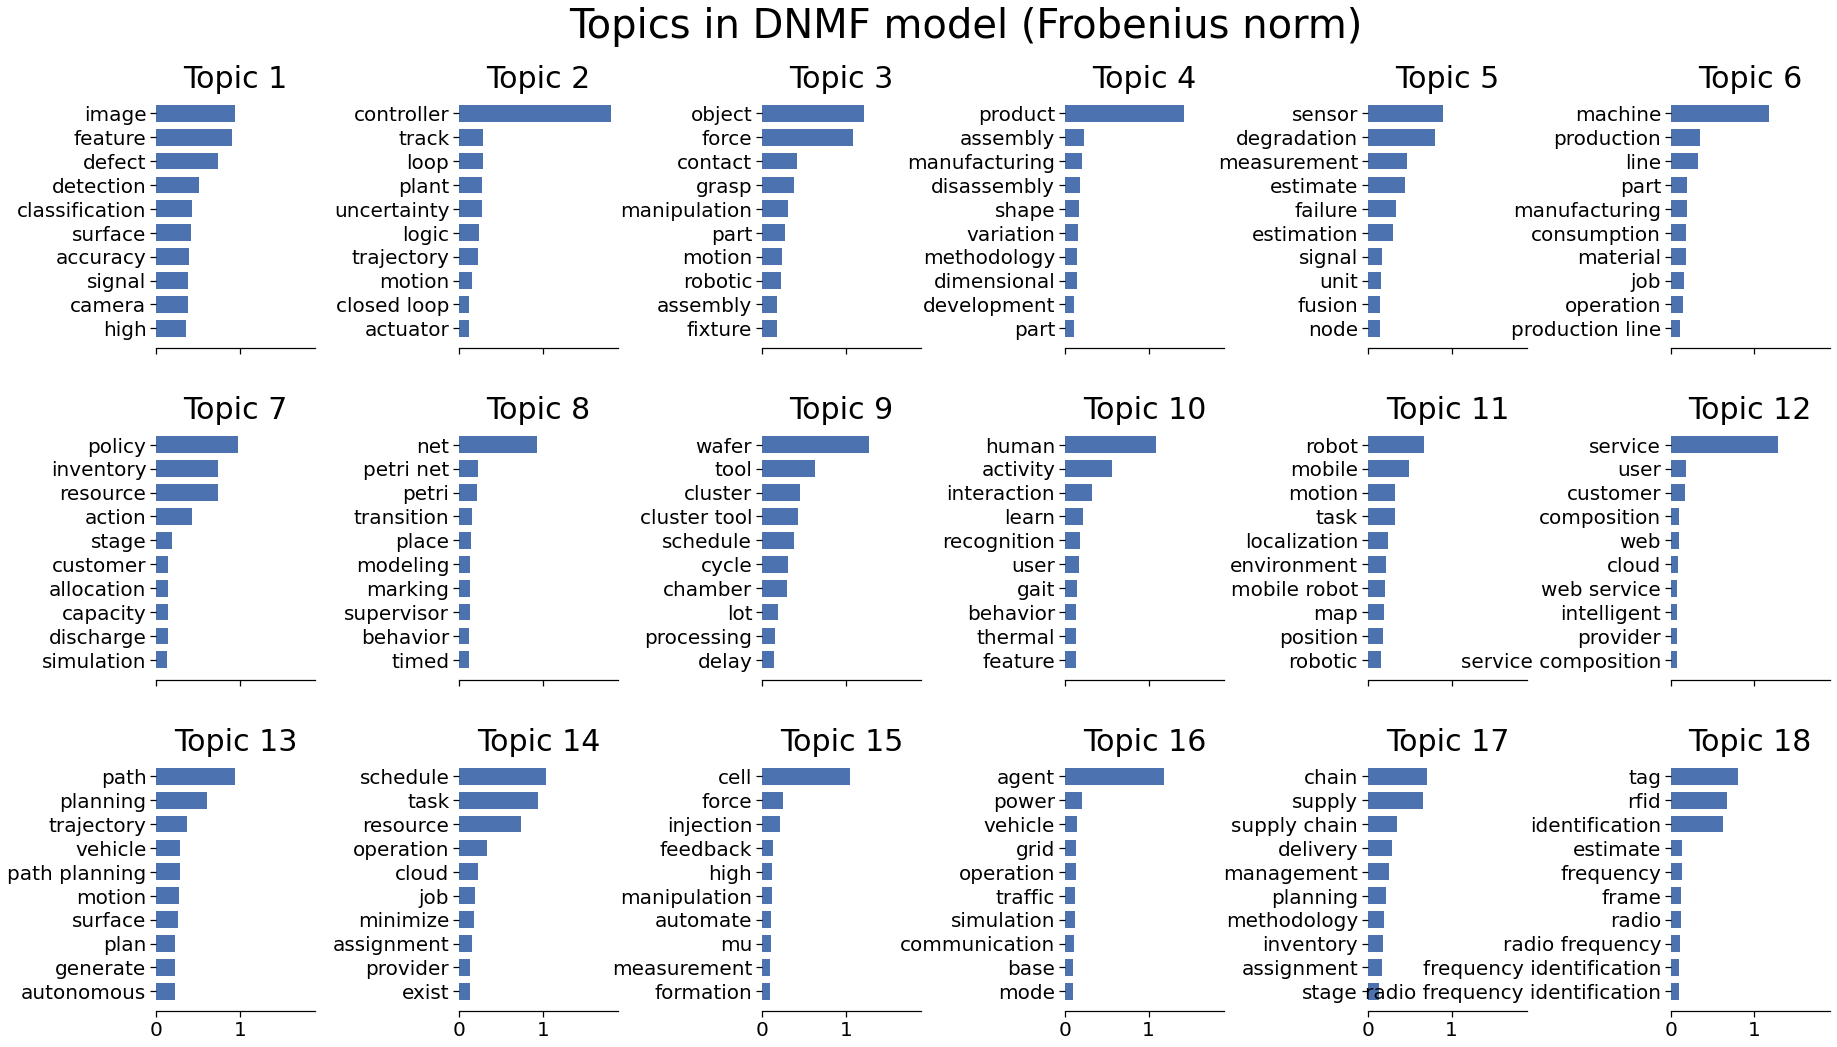

In [42]:
import matplotlib.pyplot as plt
topic_order=max_num_index_list(List_W_A,len(dynamic_res[2]))
feature_names=[]
for i in range(len(dynamic_res[2])):
#     print('DT'+str(i+1),dynamic_res[2][topic_order[i]][0:10])
    
    feature_names.append(dynamic_res[2][topic_order[i]][0:10])


n_top_words=10
title="Topics in DNMF model (Frobenius norm)"

for i in range(len(dynamic_res[2])):
    print(feature_names[i][0:n_top_words])

fig, axes = plt.subplots(3, 6, figsize=(30, 15), sharex=True)
axes = axes.flatten()

for i in range(len(dynamic_res[2])):
    top_features=feature_names[i][0:n_top_words]
    top_features_ind=dynamic_res[5][i].argsort()[: -10 - 1 : -1]
    weights=dynamic_res[5][i][top_features_ind]
#     print(weights)
    ax = axes[i]
    ax.barh(top_features, weights, height=0.7)
    ax.set_title(f"Topic {i +1}", fontdict={"fontsize": 30})
    ax.invert_yaxis()
    ax.tick_params(axis="both", which="major", labelsize=20)
    for i in "top right left".split():
        ax.spines[i].set_visible(False)
    fig.suptitle(title, fontsize=40)

plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
plt.show()

In [43]:
# Step 5A: Result analysis
import unsupervised.nmf
import numpy as np
dynamic_res = unsupervised.nmf.load_nmf_results(out_dir_dynamictopic1[0]+'\\dynamictopics_convex_k18.pkl')

print(np.shape(dynamic_res[0]))
print(np.shape(dynamic_res[1]))
print(np.shape(dynamic_res[2]))
print(np.shape(dynamic_res[3]))
print(np.shape(dynamic_res[4]))
print(np.shape(dynamic_res[5]))
for i in range(len(dynamic_res[2])):
#     print('DT'+str(i+1),dynamic_res[2][i][0:10])
    print(dynamic_res[2][i][0],dynamic_res[2][i][1],dynamic_res[2][i][2],dynamic_res[2][i][3],dynamic_res[2][i][4],dynamic_res[2][i][5],dynamic_res[2][i][6],dynamic_res[2][i][7],dynamic_res[2][i][8],dynamic_res[2][i][9])

(284,)
(6713,)
(18, 6713)
(284,)
(284, 18)
(18, 6713)
service task user cloud customer composition web provider resource web service
machine production line part manufacturing consumption job material schedule operation
sensor degradation measurement failure signal unit estimate fusion estimation determine
vehicle agent power grid traffic task uncertainty schedule communication base
mode operation detection signal industrial identification alarm normal output key
tag rfid identification frequency estimate frame radio radio frequency frequency identification radio frequency identification
controller loop track trajectory plant motion logic closed loop uncertainty closed
cell injection force feedback schedule high automate mu formation manipulation
wafer tool schedule cluster cluster tool cycle chamber lot delay operation
object force contact grasp manipulation robotic part motion grasping fixture
chain supply supply chain planning delivery management para methodology inventory assignmen

In [44]:
W_A = [0 for i in range(len(dynamic_res[6]))]
print(np.shape(W_A))
for j in range(len(dynamic_res[6])):
    for i in range(len(dynamic_res[4])):
        W_A[j]=W_A[j]+dynamic_res[4][i][j]
List_W_A=[]
for j in range(len(dynamic_res[6])):
#     print('DT'+str(j+1),W_A[j]/sum(W_A))
    List_W_A.append(W_A[j]/sum(W_A))
    print(W_A[j]/sum(W_A))

(18,)
0.04466609975551566
0.12990809317947344
0.04872339776495621
0.03261181797717962
0.03197469754021571
0.028465707025591706
0.05534754307129395
0.06484696644920243
0.07450951229918573
0.13907201107554412
0.021178794813707054
0.031011761405820043
0.02559553188050876
0.02474295947836401
0.1471437367300272
0.027260463247378734
0.015901498003578006
0.05703940830245769


In [45]:
def max_num_index_list(list_orginal,top_num):
    index_list=[]
    import copy
    list_temp=copy.copy(list_orginal)
    import math
    for i in range(0,top_num,1):
        index_list.append(list_temp.index(max(list_temp)))
        list_temp[list_temp.index(max(list_temp))]=-math.inf
    return index_list
max_num_index_list(List_W_A,len(dynamic_res[6]))

[14, 9, 1, 8, 7, 17, 6, 2, 0, 3, 4, 11, 5, 15, 12, 13, 10, 16]

In [46]:
topic_order=max_num_index_list(List_W_A,len(dynamic_res[2]))
for i in range(len(dynamic_res[2])):
    print('DT'+str(i+1),dynamic_res[2][topic_order[i]][0:10])
#     print('DT'+str(i+1),dynamic_res[2][topic_order[i]][0:20])
#     print(dynamic_res[2][topic_order[i]][0],',',dynamic_res[2][topic_order[i]][1],',',dynamic_res[2][topic_order[i]][2],',',dynamic_res[2][topic_order[i]][3],',',dynamic_res[2][topic_order[i]][4],',',dynamic_res[2][topic_order[i]][5],',',dynamic_res[2][topic_order[i]][6],',',dynamic_res[2][topic_order[i]][7],',',dynamic_res[2][topic_order[i]][8],',',dynamic_res[2][topic_order[i]][9])
# List_W_A
for i in range(len(dynamic_res[2])):
    print(List_W_A[topic_order[i]])

DT1 ['robot', 'path', 'task', 'motion', 'planning', 'mobile', 'environment', 'trajectory', 'localization', 'mobile robot']
DT2 ['object', 'force', 'contact', 'grasp', 'manipulation', 'robotic', 'part', 'motion', 'grasping', 'fixture']
DT3 ['machine', 'production', 'line', 'part', 'manufacturing', 'consumption', 'job', 'material', 'schedule', 'operation']
DT4 ['wafer', 'tool', 'schedule', 'cluster', 'cluster tool', 'cycle', 'chamber', 'lot', 'delay', 'operation']
DT5 ['cell', 'injection', 'force', 'feedback', 'schedule', 'high', 'automate', 'mu', 'formation', 'manipulation']
DT6 ['image', 'camera', 'measurement', 'calibration', 'estimation', 'high', 'accuracy', 'track', 'field', 'position']
DT7 ['controller', 'loop', 'track', 'trajectory', 'plant', 'motion', 'logic', 'closed loop', 'uncertainty', 'closed']
DT8 ['sensor', 'degradation', 'measurement', 'failure', 'signal', 'unit', 'estimate', 'fusion', 'estimation', 'determine']
DT9 ['service', 'task', 'user', 'cloud', 'customer', 'compos

0.27487767036948896


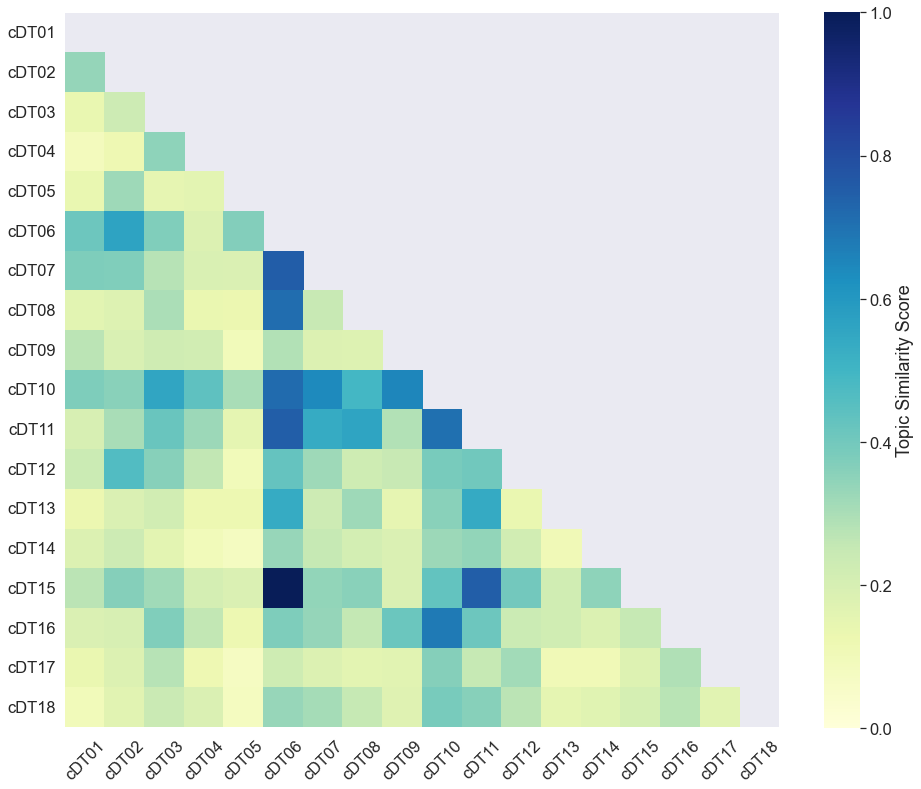

In [48]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics.pairwise import cosine_similarity    
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size

def load_NMF(my_path):
    my_NMF = joblib.load(my_path) 
    return my_NMF

if __name__ == "__main__":
    "Generate the similarity matrix of the paper K=18: Fig 4.11"
    ">>> the topic-word below the figure are added separately by hand in (fig.docx)"
    
    "1. Load doc-dynamic_topic matrix info"
    "Case for K = 18"
    dynamic_path = out_dir_dynamictopic1[0]+'\\dynamictopics_convex_k18.pkl'
    dy_NMF = load_NMF(dynamic_path)  
    year_doc = dy_NMF[0]         # year: [start, end)
    all_terms = dy_NMF[1]         # dictionary of dynamic_NMF 
    dy_term_rankings = dy_NMF[2]  # ranked terms: for each topic 
    dy_partition = dy_NMF[3]      # Topic assignment: assign to specific Dynamic topic (single membership)
    dy_W = dy_NMF[4]              # WH = X: document_topic matrix  
    dy_H = dy_NMF[5]              # WH = X: topic_term matrix 
    dy_topic_labels = dy_NMF[6]   # this is the topic ids

    "change topic order to orders in paper"
    paper_index = max_num_index_list(List_W_A,len(dynamic_res[6]))


    # for i in paper_index:
    #     print(i+1, dy_term_rankings[i][:10])
    H = dy_H[paper_index, :]

    # Plot
    labels = ['cDT'+"%02d"%(i+1) for i in range(len(dynamic_res[6]))]
    
    similarities = cosine_similarity(H)
    mask = np.zeros_like(similarities)              # same shape: all 0s
    mask[np.triu_indices_from(mask)] = True         # upper triangular 
    mask[np.diag_indices(mask.shape[0])] = False        # upper triangular    
    scale = max(similarities[mask==1])
    print(scale)
    mask[np.triu_indices_from(mask)] = True         # upper triangular
    similarities = similarities / scale
#     similarities = similarities / 0.22018661070393516
#     similarities = similarities / 0.2   
    
    plt.figure(figsize=(16, 16),facecolor='white') # width and height in inches
    with sns.axes_style("dark"):
        sns.set(font_scale=1.5)
        ax = sns.heatmap(similarities, mask=mask, vmax=1,vmin=0, square=True,  cmap="YlGnBu", cbar_kws={'label': 'Topic Similarity Score','shrink': 0.823})
#         sns.heatmap(similarities, annot=True, cmap='YlGnBu', annot_kws={"fontsize":20})
#         ax.xaxis.set_ticks([i for i in range(0,18,1)]); ax.yaxis.set_ticks([i for i in range(0,18,1)])
        ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels)
#         ax.xaxis.set_ticklabels(['T'+"%02d"%(i+1) for i in range(18)]); ax.yaxis.set_ticklabels(['T'+"%02d"%(i+1) for i in range(18)])
#         plt.tick_params(labelsize=14)
        plt.yticks(rotation=0)
        plt.xticks(rotation=45)
        plt.show()

['robot', 'path', 'task', 'motion', 'planning', 'mobile', 'environment', 'trajectory', 'localization', 'mobile robot']
['object', 'force', 'contact', 'grasp', 'manipulation', 'robotic', 'part', 'motion', 'grasping', 'fixture']
['machine', 'production', 'line', 'part', 'manufacturing', 'consumption', 'job', 'material', 'schedule', 'operation']
['wafer', 'tool', 'schedule', 'cluster', 'cluster tool', 'cycle', 'chamber', 'lot', 'delay', 'operation']
['cell', 'injection', 'force', 'feedback', 'schedule', 'high', 'automate', 'mu', 'formation', 'manipulation']
['image', 'camera', 'measurement', 'calibration', 'estimation', 'high', 'accuracy', 'track', 'field', 'position']
['controller', 'loop', 'track', 'trajectory', 'plant', 'motion', 'logic', 'closed loop', 'uncertainty', 'closed']
['sensor', 'degradation', 'measurement', 'failure', 'signal', 'unit', 'estimate', 'fusion', 'estimation', 'determine']
['service', 'task', 'user', 'cloud', 'customer', 'composition', 'web', 'provider', 'resource

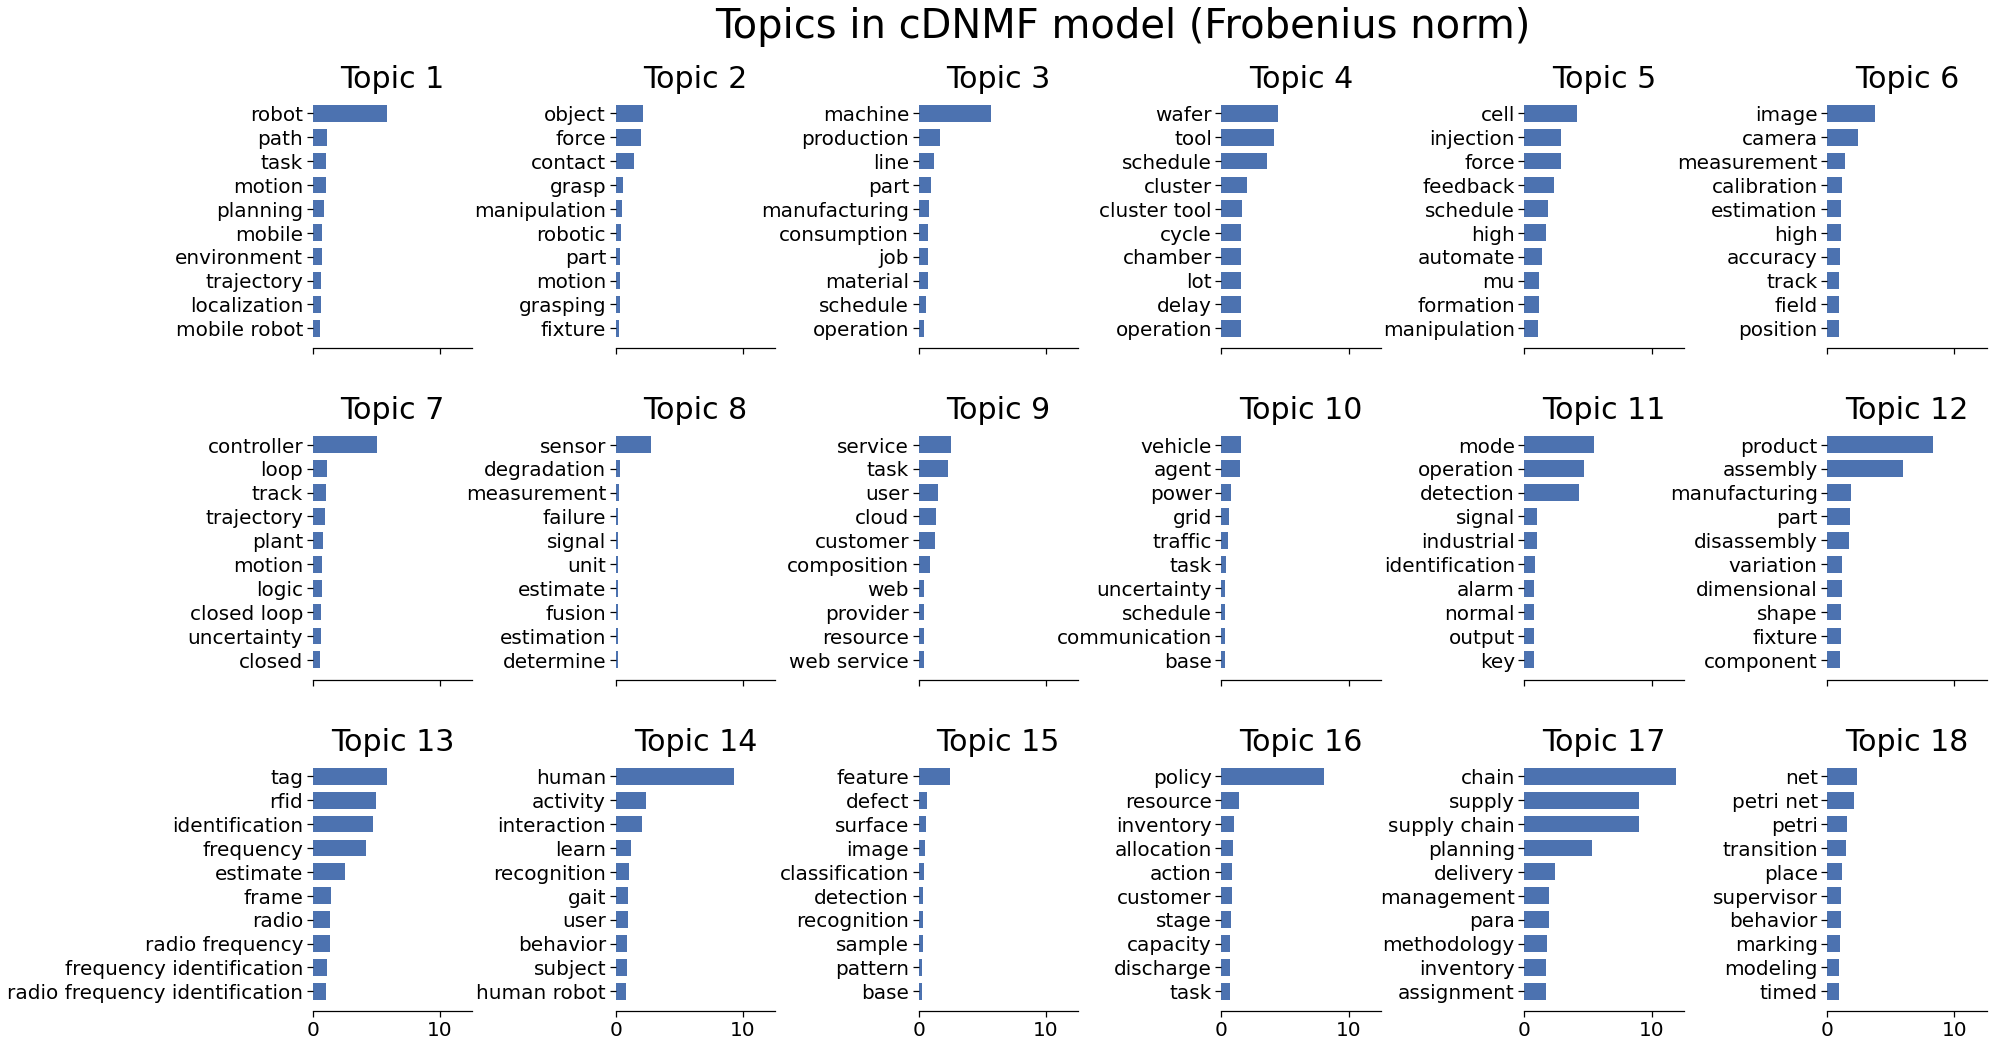

In [50]:
import matplotlib.pyplot as plt
topic_order=max_num_index_list(List_W_A,len(dynamic_res[2]))
feature_names=[]
for i in range(len(dynamic_res[2])):
#     print('DT'+str(i+1),dynamic_res[2][topic_order[i]][0:10])
    
    feature_names.append(dynamic_res[2][topic_order[i]][0:10])


n_top_words=10
title="Topics in cDNMF model (Frobenius norm)"

for i in range(len(dynamic_res[2])):
    print(feature_names[i][0:n_top_words])

fig, axes = plt.subplots(3, 6, figsize=(30, 15), sharex=True)
axes = axes.flatten()

for i in range(len(dynamic_res[2])):
    top_features=feature_names[i][0:n_top_words]
    top_features_ind=dynamic_res[5][i].argsort()[: -10 - 1 : -1]
    weights=dynamic_res[5][i][top_features_ind]
#     print(weights)
    ax = axes[i]
    ax.barh(top_features, weights, height=0.7)
    ax.set_title(f"Topic {i +1}", fontdict={"fontsize": 30})
    ax.invert_yaxis()
    ax.tick_params(axis="both", which="major", labelsize=20)
    for i in "top right left".split():
        ax.spines[i].set_visible(False)
    fig.suptitle(title, fontsize=40)

plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
plt.show()